## Lista: 6a
Aluno: Arthur Mauricio

In [85]:
import numpy as np
import math
import sys
import matplotlib.pyplot as plt

In [86]:
def calc_erro_rel(serie):
    erros_aux = []
    for j in range(1, serie.size):
        erro = np.abs((serie[j-1] - serie[j])/serie[j-1])
        erros_aux.append(erro)
    return np.array(erros_aux)

In [87]:
def calc_erro_real(serie, val):
    erros_aux = []
    for j in range(serie.size):
        erros_aux.append(np.abs(1-(serie[j]/val)))
    return np.array(erros_aux)

### Questão 1

In [88]:
def bissecao(a,b,f, erro_tol = 1e-10, max_it = None):
    i,a_i,b_i = 0,a,b
    erro, x_ant, x = 1, a, a
    if((np.sign(f(a))*np.sign(f(b))) != -1):
        raise Exception("Não existe raiz nesse intervalo")
    else:
        while(erro > erro_tol):
            x = (a_i+b_i)/2
            sign_inf = np.sign(f(a_i))
            sign_sup = np.sign(f(x))
            if(f(x)==0):
                return x
            else:
                if(sign_inf * sign_sup == -1):
                    b_i = x
                else:
                    a_i = x
            i+=1
            print(f"Aproximação nº {i}: {x}")
            erro = np.abs((x - x_ant)/x)
            x_ant = x
            i+1
            if(max_it != None and i == max_it):
                print("Máximo de iterações atingido")
                return x
    return x





In [89]:
f_1 = lambda x : 2*x

In [90]:
bissecao(-100, 100, f_1)

0.0

## Questão 2

In [91]:
f = lambda x : -0.5*(math.pow(x, 2)) + 2.5 * x + 4.5

Forma gráfica

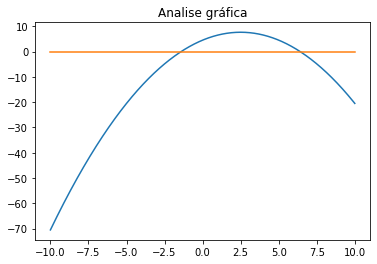

In [92]:
axis_x = np.linspace(-10, 10, 1000)
plt.title("Analise gráfica")
plt.plot(axis_x, [f(i) for i in axis_x])
plt.plot([-10,10],[0,0])
plt.show()

Podemos ver que as raizes estão entre: 0 e -2.5, e entre 5 e 7.5

Calculando com a fórmula quadrática (utilizando o método np.roots)

In [93]:
np.roots([-0.5,2.5,4.5])

array([ 6.40512484, -1.40512484])

Calculando com método da bisseção

In [94]:
bissecao(a = 5, b = 10, max_it=3, f =f)

Aproximação nº 1: 7.5
Aproximação nº 2: 6.25
Aproximação nº 3: 6.875
Máximo de iterações atingido


6.875

Erro relativo das iterações

In [95]:
calc_erro_rel(np.array([7.5,6.25,6.875]))

array([0.16666667, 0.1       ])

Erro entre as iterações e os valores reais

In [98]:
calc_erro_real(np.array([7.5,6.25,6.875]),6.405125)

array([0.17093734, 0.02421889, 0.07335922])

### Questão 3

In [99]:
s = lambda x : np.sin(x)

### Questão 4

In [102]:
f = lambda x : 2*math.pow(x,6) - 1.5*math.pow(x,4)+10*x+20
d_v = lambda  x: -12*math.pow(x,5) -6*math.pow(x,3)+10

In [107]:
bissecao(a = 0, b = 1, f= d_v, erro_tol=0.05)

Aproximação nº 1: 0.5
Aproximação nº 2: 0.75
Aproximação nº 3: 0.875
Aproximação nº 4: 0.8125
Aproximação nº 5: 0.84375


0.84375

### Questão 5

In [108]:
def regula_falsi(x_i, x_u,f, erro_tol = 1e-10):
    if((np.sign(f(x_i))*np.sign(f(x_u))) != -1):
        raise Exception("Não existe raiz nesse intervalo")

    x = x_u - (f(x_u)*(x_i*x_u))/(f(x_i)-f(x_u))

In [ ]:
def bissecao(a,b,f, erro_tol = 1e-10, max_it = None):
    i,a_i,b_i = 0,a,b
    erro, x_ant, x = 1, a, a
    if((np.sign(f(a))*np.sign(f(b))) != -1):
        raise Exception("Não existe raiz nesse intervalo")
    else:
        while(erro > erro_tol):
            x = (a_i+b_i)/2
            sign_inf = np.sign(f(a_i))
            sign_sup = np.sign(f(x))
            if(f(x)==0):
                return x
            else:
                if(sign_inf * sign_sup == -1):
                    b_i = x
                else:
                    a_i = x
            i+=1
            print(f"Aproximação nº {i}: {x}")
            erro = np.abs((x - x_ant)/x)
            x_ant = x
            i+1
            if(max_it != None and i == max_it):
                print("Máximo de iterações atingido")
                return x
    return x



